In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
import seaborn as sns
sns.set() 

In [13]:
def Bar_Chart(feature):
    SURVIVED = train[train['Survived']==1][feature].value_counts()
    DEAD = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([SURVIVED,DEAD])
    df.index = ['Lived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

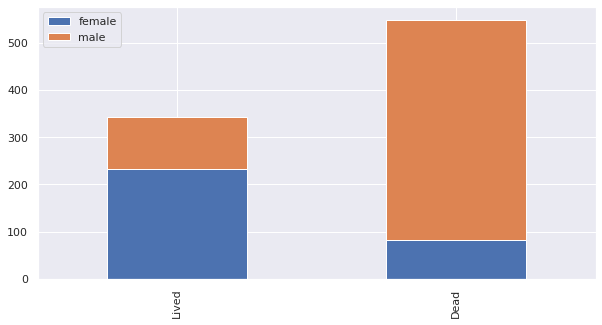

In [14]:
Bar_Chart('Sex')

In [15]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [16]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Countess      1
Mme           1
Sir           1
Lady          1
Jonkheer      1
Ms            1
Capt          1
Name: Title, dtype: int64

In [17]:
title_mapping = {"Mr":0,"Mrs":2,"Miss":1,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Sir":3,"Countess":3,"Don":3,"Mme":3,"Capt":3,"Ms":3,"Jonkheer":3,"Lady":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [158]:
test['Title'].value_counts()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Title          417 non-null float64
Emabarked      418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


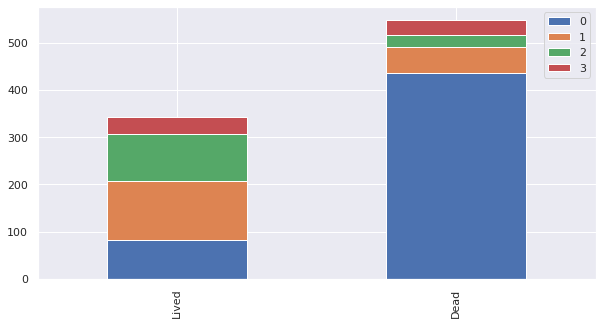

In [19]:
Bar_Chart('Title')

In [21]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [22]:
sex_mapping = {'male': 0,'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    

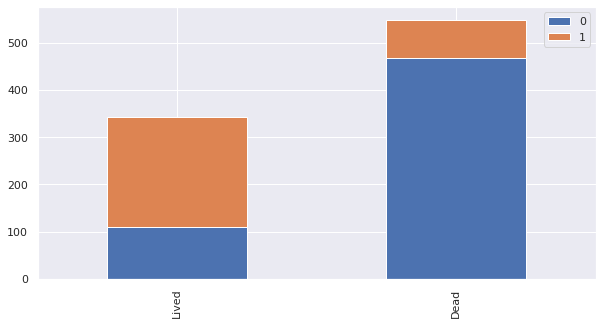

In [23]:
Bar_Chart('Sex')

In [24]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [25]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


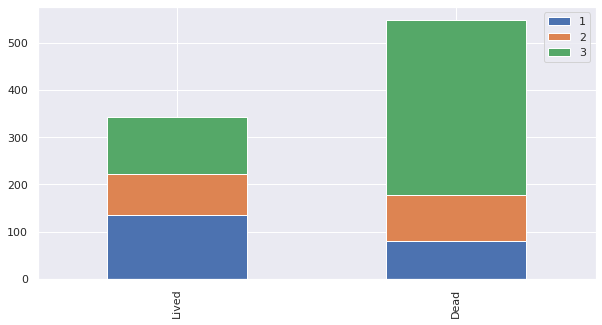

In [28]:
Bar_Chart('Pclass')

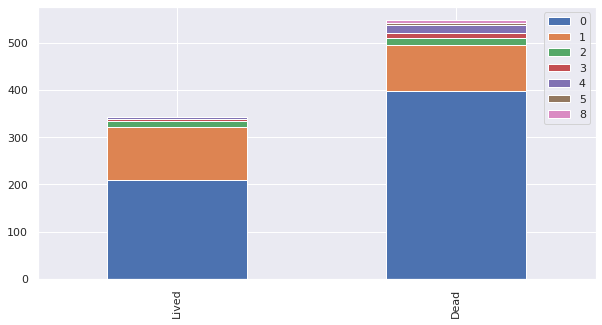

In [29]:
Bar_Chart('SibSp')

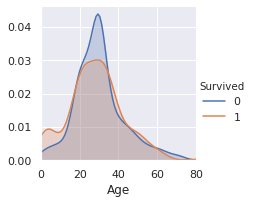

In [31]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

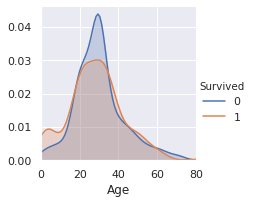

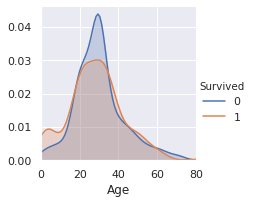

In [32]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show(0,20)

(0, 20)

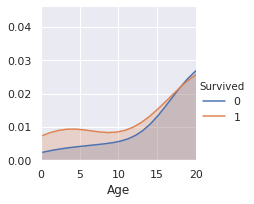

In [33]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 40)

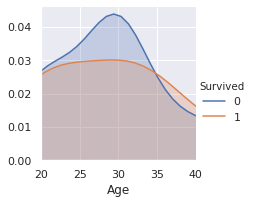

In [34]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,40)

(40, 60)

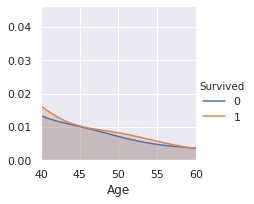

In [35]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(40,60)

(20, 80.0)

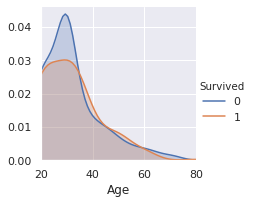

In [36]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20)

(20, 25)

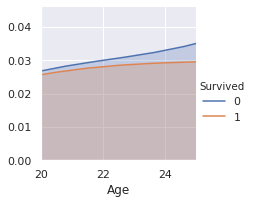

In [37]:
facet = sns.FacetGrid(train,hue="Survived",aspect=1)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,25)

In [38]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [40]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age'] = 0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=46),'Age'] = 3,
    dataset.loc[dataset['Age']>46,'Age'] = 4

In [41]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,4.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0


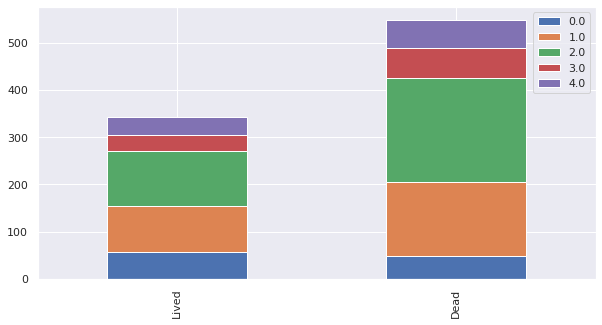

In [44]:
Bar_Chart('Age')

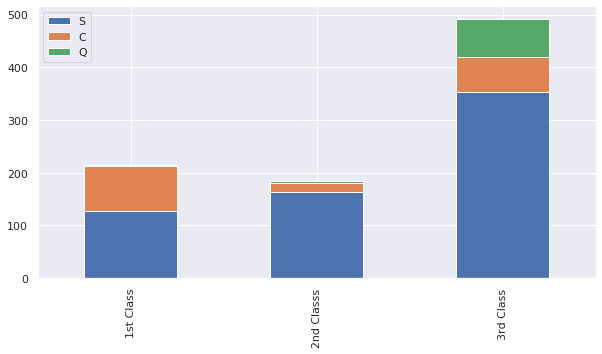

In [50]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts() 
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Classs','3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [51]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [55]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Emabarked']=dataset['Embarked'].map(embarked_mapping)

In [59]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"),inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"),inplace=True)

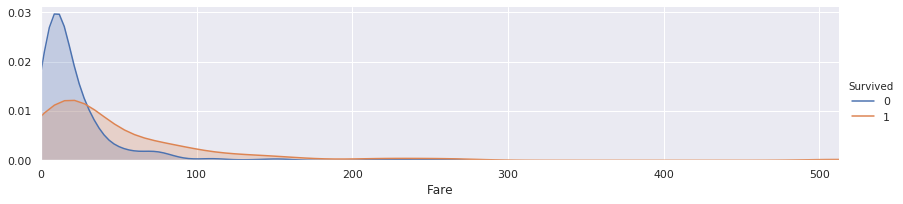

In [67]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 10)

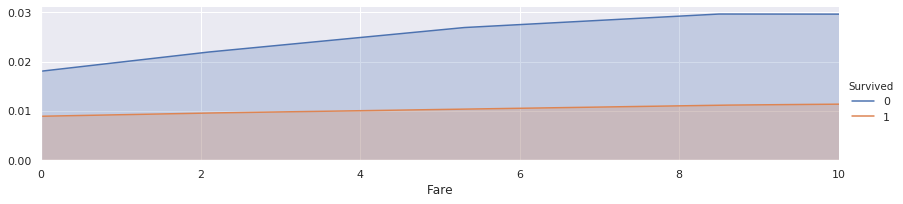

In [68]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,10)

In [71]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare'] = 0,
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare'] = 1,
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare'] = 2,
    dataset.loc[(dataset['Fare']>100),'Fare'] = 4

In [72]:
 train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Emabarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C85,C,2,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,0
3,4,1,1,1,2.0,1,0,113803,0.0,C123,S,2,0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0,0


In [73]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F33            3
              ..
C91            1
B80            1
B38            1
A20            1
B79            1
Name: Cabin, Length: 147, dtype: int64

In [74]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [75]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Emabarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C,C,2,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,0
3,4,1,1,1,2.0,1,0,113803,0.0,C,S,2,0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0,0


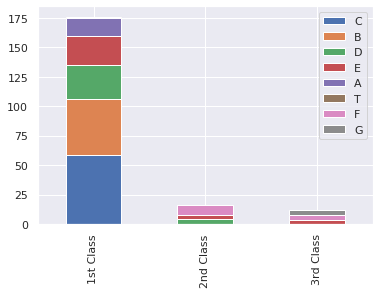

In [81]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True)


In [82]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset["Cabin"].map(cabin_mapping)

In [84]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [85]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Emabarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,S,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,0.8,C,2,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,1,0
3,4,1,1,1,2.0,1,0,113803,0.0,0.8,S,2,0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,S,0,0


In [87]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1


In [88]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,S,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,0.0,0.8,C,2,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,1,0,1
3,4,1,1,1,2.0,1,0,113803,0.0,0.8,S,2,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,S,0,0,1


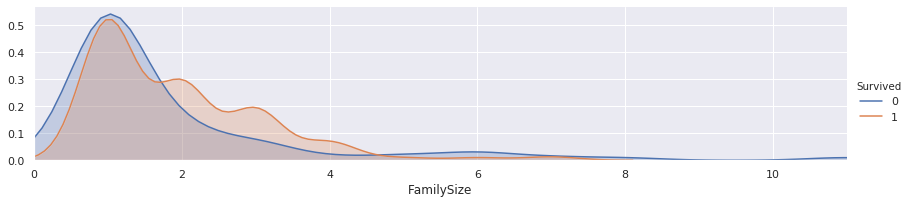

In [89]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()


In [90]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset["FamilySize"].map(family_mapping)

In [91]:
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,Q,0.0,2,0.0
1,893,3,1,4.0,1,0,363272,0.0,2.0,S,2.0,0,0.4
2,894,2,0,4.0,0,0,240276,0.0,2.0,Q,0.0,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,S,0.0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,S,2.0,0,0.8


In [113]:
features_drop=["Ticket","SibSp","Parch","Embarked"]
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'],axis=1)

KeyError: "['Ticket' 'SibSp' 'Parch'] not found in axis"

In [94]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,0,3,0,1.0,0.0,2.0,S,0,0,0.4
1,1,1,1,3.0,0.0,0.8,C,2,1,0.4
2,1,3,1,1.0,0.0,2.0,S,1,0,0.0
3,1,1,1,2.0,0.0,0.8,S,2,0,0.4
4,0,3,0,2.0,0.0,2.0,S,0,0,0.0


In [95]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,892,3,0,2.0,0.0,2.0,Q,0.0,2,0.0
1,893,3,1,4.0,0.0,2.0,S,2.0,0,0.4
2,894,2,0,4.0,0.0,2.0,Q,0.0,2,0.0
3,895,3,0,2.0,0.0,2.0,S,0.0,0,0.0
4,896,3,1,1.0,0.0,2.0,S,2.0,0,0.8


In [126]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']
train_data.shape,target.shape


((891, 8), (891,))

In [112]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,3,0,1.0,0.0,2.0,S,0,0,0.4
1,1,1,3.0,0.0,0.8,C,2,1,0.4
2,3,1,1.0,0.0,2.0,S,1,0,0.0
3,1,1,2.0,0.0,0.8,S,2,0,0.4
4,3,0,2.0,0.0,2.0,S,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,S,3,0,0.0
887,1,1,1.0,0.0,0.4,S,1,0,0.0
888,3,1,1.0,0.0,2.0,S,1,0,1.2
889,1,0,1.0,0.0,0.8,C,0,1,0.0


In [100]:
target


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,892,3,0,2.0,0.0,2.0,Q,0.0,2,0.0
1,893,3,1,4.0,0.0,2.0,S,2.0,0,0.4
2,894,2,0,4.0,0.0,2.0,Q,0.0,2,0.0
3,895,3,0,2.0,0.0,2.0,S,0.0,0,0.0
4,896,3,1,1.0,0.0,2.0,S,2.0,0,0.8


In [107]:
train = train.drop["Embarked", axis = 1]

SyntaxError: invalid syntax (<ipython-input-107-6d83d5eea72c>, line 1)

In [108]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Emabarked,FamilySize
0,0,3,0,1.0,0.0,2.0,S,0,0,0.4
1,1,1,1,3.0,0.0,0.8,C,2,1,0.4
2,1,3,1,1.0,0.0,2.0,S,1,0,0.0
3,1,1,1,2.0,0.0,0.8,S,2,0,0.4
4,0,3,0,2.0,0.0,2.0,S,0,0,0.0


In [114]:
train = train.drop(['Embarked'],axis=1)

In [115]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Title,Emabarked,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,0.0,0.8,2,1,0.4
2,1,3,1,1.0,0.0,2.0,1,0,0.0
3,1,1,1,2.0,0.0,0.8,2,0,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,0.0,1.8,3,0,0.0
887,1,1,1,1.0,0.0,0.4,1,0,0.0
888,0,3,1,1.0,0.0,2.0,1,0,1.2
889,1,1,0,1.0,0.0,0.8,0,1,0.0


In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [120]:
import numpy as np

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Title         891 non-null int64
Emabarked     891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [123]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True ,random_state=0)


In [128]:
clf = KNeighborsClassifier(n_neighbors= 13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.76404494 0.80898876 0.82022472 0.82022472 0.83146067
 0.79775281 0.82022472 0.82022472 0.80898876]


In [127]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Title,Emabarked,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,0.0,0.8,2,1,0.4
2,3,1,1.0,0.0,2.0,1,0,0.0
3,1,1,2.0,0.0,0.8,2,0,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [133]:
round(np.mean(score)*100,2)

80.59

In [135]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1, scoring=scoring)
print(score)


[0.75555556 0.78651685 0.75280899 0.76404494 0.87640449 0.79775281
 0.79775281 0.83146067 0.75280899 0.7752809 ]


In [136]:
round(np.mean(score)*100,2)

78.9

In [137]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1, scoring=scoring)
print(score)

[0.8        0.78651685 0.7752809  0.79775281 0.87640449 0.79775281
 0.80898876 0.80898876 0.7752809  0.82022472]


In [138]:
round(np.mean(score)*100,2)

80.47

In [139]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.75280899 0.76404494 0.76404494 0.74157303 0.82022472
 0.80898876 0.83146067 0.83146067 0.82022472]


In [140]:
round(np.mean(score)*100,2)

79.57

In [141]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.7752809  0.82022472 0.82022472 0.85393258 0.79775281
 0.83146067 0.86516854 0.84269663 0.85393258]


In [142]:
round(np.mean(score)*100,2)

83.05

In [181]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [164]:
test


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Title,Emabarked,FamilySize
0,892,3,0,2.0,0.0,2.0,0.0,2,0.0
1,893,3,1,4.0,0.0,2.0,2.0,0,0.4
2,894,2,0,4.0,0.0,2.0,0.0,2,0.0
3,895,3,0,2.0,0.0,2.0,0.0,0,0.0
4,896,3,1,1.0,0.0,2.0,2.0,0,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,2.0,0.0,0,0.0
414,1306,1,1,3.0,4.0,0.8,1.0,1,0.0
415,1307,3,0,3.0,0.0,2.0,0.0,0,0.0
416,1308,3,0,2.0,0.0,2.0,0.0,0,0.0


In [159]:
test["Title"].fillna(test.groupby("Pclass")["Title"].transform("median"), inplace=True)

In [182]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv',index=False)

In [183]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [168]:
clf =  RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [169]:
submissionRFC = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submissionRFC.to_csv('submissionRFC.csv',index=False)

In [170]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [171]:
submissionDC = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submissionDC.to_csv('submissionDC.csv',index=False)

In [172]:
submission = pd.read_csv('submissionDC.csv')
submissionDC.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [176]:
clf = KNeighborsClassifier(n_neighbors= 13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [184]:
submissionKNN = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submissionKNN.to_csv('submissionKNN.csv',index=False)